In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/dataset_train.csv')[['Hogwarts House', 'Herbology', 'Defense Against the Dark Arts',
       'Divination', 'Muggle Studies', 'Ancient Runes', 'History of Magic',
       'Transfiguration', 'Care of Magical Creatures', 'Charms', 'Flying']]
df.head()

,Hogwarts House,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Care of Magical Creatures,Charms,Flying
0,Ravenclaw,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,0.715939,-232.79405,-26.89
1,Slytherin,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,0.091674,-252.18425,-113.45
2,Ravenclaw,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,-0.515327,-227.34265,30.42
3,Gryffindor,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,-0.014040,-256.84675,200.64
4,Gryffindor,-7.820623,NaN,2.236,-444.262537,599.324514,-3.444377,937.434724,-0.264070,-256.38730,157.98


In [3]:
# for train: Ravenclaw -> Slytherin -> Gryffindor
df = df[['Hogwarts House', 'Muggle Studies', 'Charms', 'Divination', 'Flying', 'History of Magic', 'Transfiguration']]
df.head()

,Hogwarts House,Muggle Studies,Charms,Divination,Flying,History of Magic,Transfiguration
0,Ravenclaw,272.035831,-232.79405,4.722,-26.89,5.231058,1039.788281
1,Slytherin,-487.340557,-252.18425,-5.612,-113.45,4.107170,1058.944592
2,Ravenclaw,664.893521,-227.34265,6.140,30.42,3.555579,1088.088348
3,Gryffindor,-537.001128,-256.84675,4.026,200.64,-4.809637,920.391449
4,Gryffindor,-444.262537,-256.38730,2.236,157.98,-3.444377,937.434724


In [4]:
df.shape[0] - df.dropna().shape[0]

148

In [5]:
df = df.dropna()

In [16]:
def get_minmax(x):
    x_minmax = np.zeros([x.shape[1], 2], np.float32)
    for i in range(x.shape[1]):
        x_minmax[i] = [x[:, i].min(), x[:, i].max()]
    return x_minmax

def normalization(target, val_min, val_max):
    return (target - val_min) / (val_max - val_min)

def set_xnorm(x, x_minmax):
    for i in range(x.shape[1]):
        x[:, i] = normalization(x[:, i], *x_minmax[i])

y = df.values[:, 0]
x = df.values[:, 1:].astype(np.float32)
x_minmax = get_minmax(x)
set_xnorm(x, x_minmax)
bias = np.ones((x.shape[0], 1))
x = np.concatenate((x, bias), 1)

In [60]:
def sigmoid(predict):
    sigmoid = 1 / (1 + np.exp(-predict))
    return sigmoid

# def loss_log(y, predict):
#     loss_log = -np.mean(y * np.log(predict) +
#                         (1 - y) * np.log(1 - predict))
#     return loss_log

def loss_log(predict, y, target):

    y =  np.array(list(map(lambda x: 0 if x == target else 1, y)))

    loss_log = -np.mean(y * np.log(predict) +
                        (1 - y) * np.log(1 - predict))
    return loss_log

In [63]:
weight = np.random.random(x.shape[1] + 2)
delta = np.zeros(weight.size, np.float32)
alpha = np.array([0.0001] * weight.size, np.float32) #maybe change to scalar
epochs = 200
error = np.zeros([epochs, 3], np.float32)
for j in range(epochs):

    # predict = sigmoid(x @ weight)
    predict_r = sigmoid(np.concatenate([x[:, 0:2],
                                        x[:, -1].reshape(-1, 1)],
                                    axis=1) @
                        np.concatenate([weight[0:2], [weight[-1]]]))
    
    predict_s = sigmoid(np.concatenate([x[:, 2:4],
                                        x[:, -1].reshape(-1, 1)],
                                    axis=1) @
                        np.concatenate([weight[2:4], [weight[-2]]]))

    predict_g = sigmoid(np.concatenate([x[:, 4:6],
                                        x[:, -1].reshape(-1, 1)],
                                    axis=1) @
                        np.concatenate([weight[4:6], [weight[-3]]]))

#     error[j] = loss_log(y, predict)
    error[j][0] = loss_log(predict_r, y, 'Ravenclaw')
    error[j][1] = loss_log(predict_r, y, 'Slytherin')
    error[j][2] = loss_log(predict_r, y, 'Gryffindor')


    for i in range(x.shape[0]):
        # predict = sigmoid(x[i] @ weight)

        predict_r = sigmoid(np.concatenate([x[i][:, 0:2],
                                            x[i][:, -1].reshape(-1, 1)],
                                            axis=1) @
                            np.concatenate([weight[0:2], [weight[-1]]]))

        # delta += (predict - y[i]) * x[i]
        delta += (predict - y[i]) * (predict * (1 - predict)) * x[i]
    weight -= delta * alpha


IndentationError: unindent does not match any outer indentation level (<ipython-input-63-2b27c608ec2c>, line 34)

In [242]:
alpha = np.array([0.01] * df_train.shape[1], np.float32)
epochs = 100
weight = np.array([np.random.rand()] * df_train.shape[1], np.float32)
for i in range(df_train.shape[0]):
    print(df_train.iloc[i][0])
    break

Ravenclaw


In [243]:
mat = np.array([[1, 2], [3, 4], [5, 6]])
vec = np.array([10, 20, 30])
vec

array([10, 20, 30])

In [244]:
vec @ mat

array([220, 280])

In [245]:
np.random.random((3, 2))

array([[0.51281249, 0.4492769 ],
       [0.61567844, 0.7252263 ],
       [0.70775219, 0.77321377]])

In [246]:
# vec = vec + 1
vec = vec + np.array([1])
vec = np.append(vec, 1)
vec

array([11, 21, 31,  1])

In [247]:
np.concatenate(vec, 1)

ValueError: zero-dimensional arrays cannot be concatenated

In [230]:
def softmax(x):
    # softmax = np.exp(x) / np.sum(np.exp(x))
    # softmax = np.e ** x / np.sum(np.e ** x)
    softmax = np.power(np.e, x) / np.sum(np.power(np.e, x))
    return softmax

ar = np.array([1.3, 5.1, 2.2, 0.7, 1.1])
# ar = softmax(ar)
ar = np.argmax(ar)
print(ar)

1


In [231]:
np.array([1, 2]) * np.array([10, 20])

array([10, 40])

In [232]:
np.arange(-10, 10 + 1)

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9,  10])

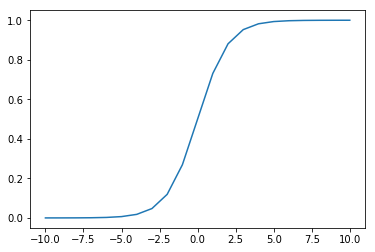

In [233]:
plt.plot(np.arange(-10, 10 + 1), sigma(np.arange(-10, 10 + 1)))
plt.show()